In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simplemc.DriverMC import DriverMC
from simplemc.plots import Simple_Plots
import corner
import arviz
from getdist import plots, MCSamples
import getdist

Hello, World! I am process 0 of 1 on isidro-pc
Initalizing nu density look up table... Done


## CPL parameterization without curvature (waCDM) with HD+SN+BBAO+Planck

In [ ]:
analysis1 = DriverMC(analyzername='mcmc', model='waCDM', datasets='HD+SN+BBAO+Planck')

In [ ]:
res1 = analysis1.executer(GRstop=0.01)

In [4]:
pars_labels = ['${}$'.format(p.Ltxname) for p in analysis1.pars_info]

['$\\Omega_m$', '$\\Omega_{b}h^2$', '$h$', '$w_0$', '$w_a$']

In [6]:
samples1 = res1['result']['samples']
weights1 = res1['result']['weights']

In [7]:
om1 = res1['result']['samples'][:,0]
obh21 = res1['result']['samples'][:,1]
h1 = res1['result']['samples'][:,2]

<Figure size 3000x3000 with 0 Axes>

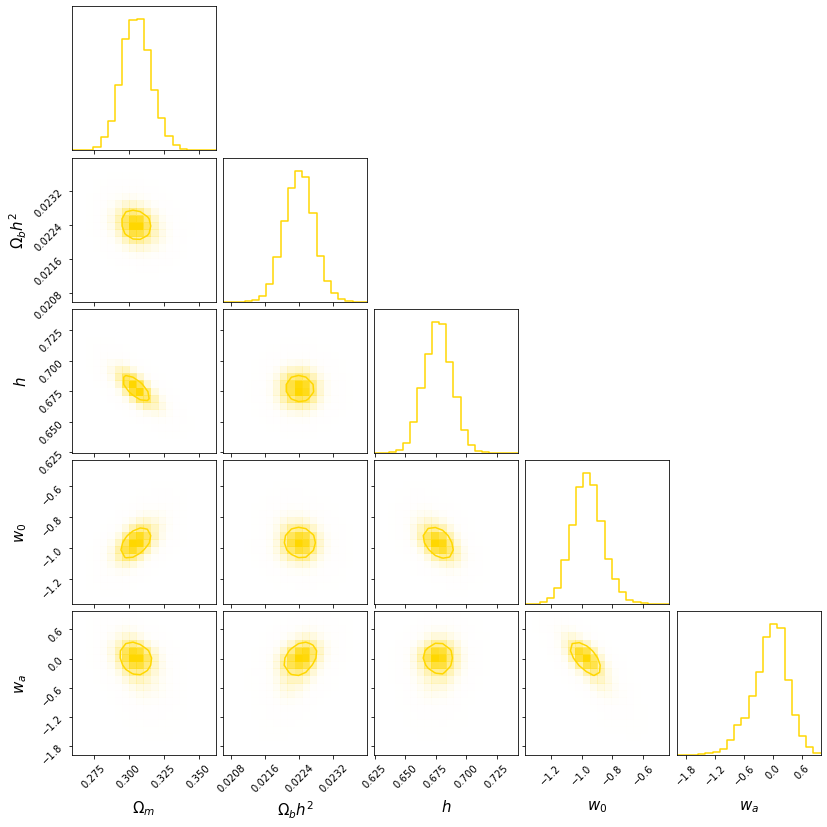

In [10]:
plt.figure(figsize=(10,10), dpi=300)
plt.clf()
figcorner1 = corner.corner(samples1, weights=weights1, smooth=0.9, smooth1d=0.5, 
                           levels=(1-np.exp(-0.5),), labels=pars_labels, label_kwargs ={'fontsize':15},
                           color='gold', 
                           plot_density=True, plot_datapoints=False, divergences=True)

## CPL parameterization without curvature (waCDM) with SN+HD

In [11]:
analysis2 = DriverMC(analyzername='mcmc', model='waCDM', datasets='HD+SN')

Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107887, 0.0005683516014088356, 0.000739250907386215] ... 0.03645982276128593
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05
w = -1.0 +/- 0.1
wa = 0.0 +/- 0.1


In [ ]:
res2 = analysis2.executer()

In [13]:
samples2 = res2['result']['samples']
weights2 = res2['result']['weights']
om2 = res2['result']['samples'][:,0]
obh22 = res2['result']['samples'][:,1]
h2 = res2['result']['samples'][:,2]

In [14]:
plt.figure(figsize=(10,10), dpi=300)
plt.clf()
cornerfig2 = corner.corner(samples2[1000:,:], weights=weights2[1000:,], smooth=0.5, smooth1d=0.5, 
                           levels=(1-np.exp(-0.5), ), labels=pars_labels, color='darkred', plot_density=True,
                           plot_datapoints=False, fig=figcorner1)

<Figure size 3000x3000 with 0 Axes>

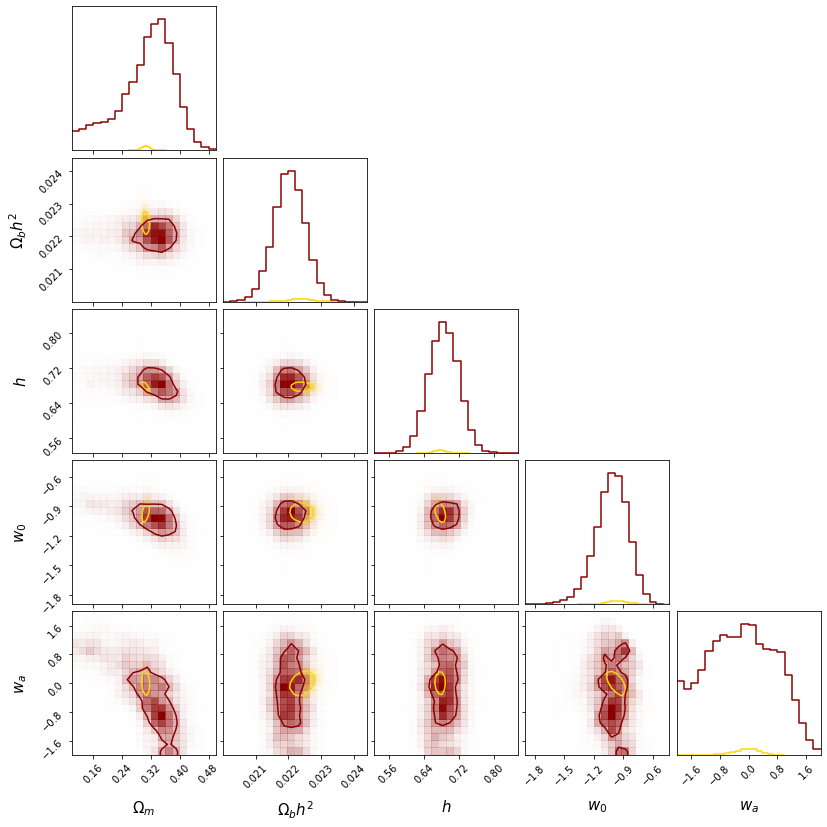

In [15]:
cornerfig2

## CPL parameterization without curvature (waCDM) with HD+SN+BBAO

In [ ]:
analysis3 = DriverMC(analyzername='mcmc', model='waCDM', datasets='HD+SN+BBAO')

In [ ]:
res3 = analysis3.executer()

In [18]:
samples3 = res3['result']['samples']
weights3 = res3['result']['weights']

## CPL parameterization without curvature (waCDM) with SN+BBAO

In [ ]:
analysis5 = DriverMC(analyzername='mcmc', model='waCDM', datasets='SN+BBAO')

In [ ]:
res5 = analysis5.executer()

In [23]:
samples5 = res5['result']['samples']
weights5 = res5['result']['weights']

In [24]:
plt.figure(figsize=(10,10), dpi=300)
plt.clf()
cornerfig5 = corner.corner(samples5, weights=weights5, smooth=0.5, smooth1d=0.5, 
                           #                      quantiles=(0.16, 0.84), 
                     levels=(1-np.exp(-0.5), ), labels=pars_labels, color='forestgreen', plot_density=True,
                     plot_datapoints=False, fig=cornerfig3)


cornerfig5.text(0.8, 0.95,'SN+BBAO', fontsize=20, color='forestgreen')
cornerfig5.text(0.8, 0.90,'SN+HD', fontsize=20, color='darkred')
cornerfig5.text(0.8, 0.85,'SN+HD+BBAO', fontsize=20, color='indigo')
cornerfig5.text(0.8, 0.8,'SN+HD+BBAO+Planck', fontsize=20, color='gold')
cornerfig5.savefig('wacdm_datasets_5.png')

<Figure size 3000x3000 with 0 Axes>

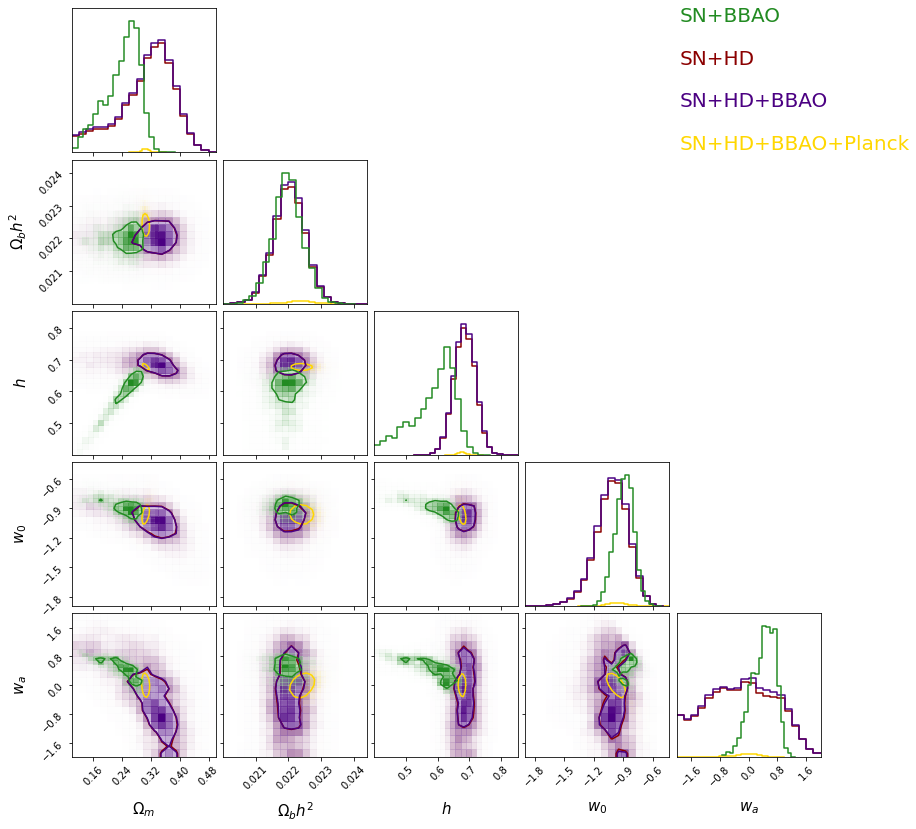

In [25]:
cornerfig5

# Plots with getdist

In [26]:
labels =  ['{}'.format(p.Ltxname) for p in analysis1.pars_info]

(['\\Omega_m', '\\Omega_{b}h^2', 'h', 'w_0', 'w_a'], (8200, 5))

In [27]:
samp1 = MCSamples(samples=samples1, names=labels, labels = labels, label='SN+HD+BBAO+Planck')
samp2 = MCSamples(samples=samples2, names = labels, labels = labels, label='SN+HD')
samp3 = MCSamples(samples=samples3, names = labels, labels = labels, label='SN+HD+BBAO')
samp4 = MCSamples(samples=samples5, names = labels, labels = labels, label='SN+BBAO')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


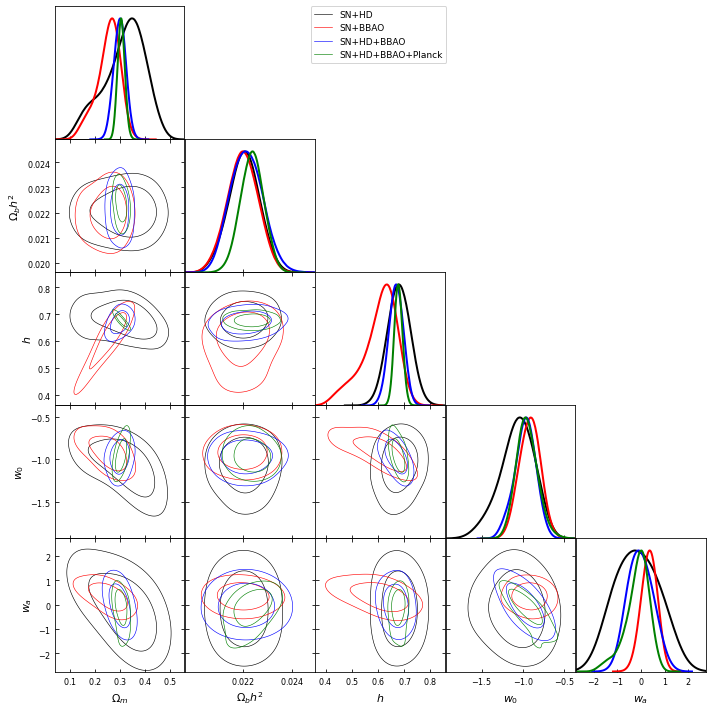

In [28]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samp2, samp4, samp3, samp1], filled=False, line_args={'lw':2},
                settings={ 'smooth_scale_2D':0.3, 'smooth_scale_1D':0.6},)

plt.savefig('wacdm_getdist.png', dpi=300)

<IPython.core.display.Javascript object>


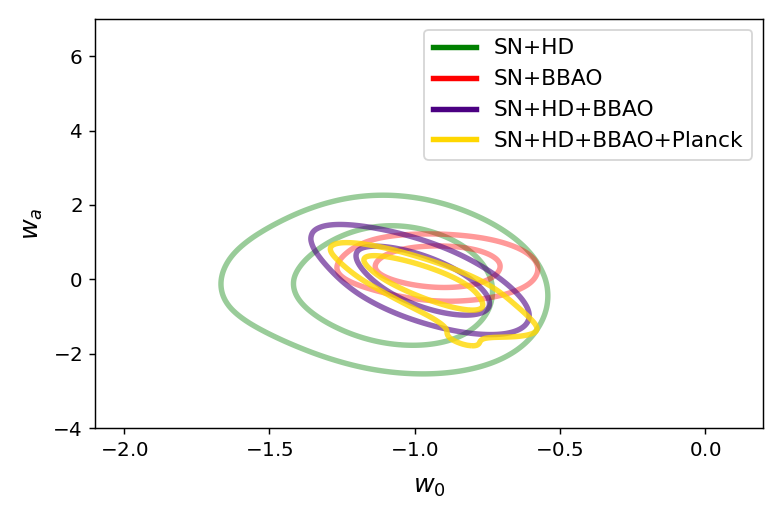

In [39]:
# Customized 2D filled comparison plot

g = plots.get_single_plotter(width_inch=6, ratio= 2. / 3.)
g.settings.legend_fontsize = 12
g.plot_2d([samp2, samp4, samp3, samp1], labels[3], labels[4], filled=False, line_args={'lw':3},
          colors=['green', 'red', 'indigo', 'gold'], lims=[-2.1, 0.2, -4, 7], alphas=[0.4,0.4,0.6,0.8], )

g.add_legend(['SN+HD', 'SN+BBAO', 'SN+HD+BBAO', 'SN+HD+BBAO+Planck'], legend_loc='upper right');
